<a href="https://colab.research.google.com/github/superbunny38/2021MachineLearning/blob/main/CS229MachineLearning/assignments/ProblemSet1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$h_\theta(x) = g(\theta^{T}x)$

$g(z) = \frac{1}{1+e^{-z}}$

Hessian Matrix of Cost function $J(\theta)$

$H_{j,k} = \frac{\vartheta^2}{\vartheta\theta_j\vartheta\theta_k}J(\theta)$
= $\frac{1}{m} ∑_{i=1}^{m}h_{\theta}(y^ix^i)(1-h_{\theta}(y^ix^i))x^i_jx^i_k$

notation

$x^{(i)}_j$
i: datasample, j: feature

# B.Implement Newtons method for optimizing J(θ), and apply it to fit a logistic regression model to the data.

### visualize data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
tmp_logistic_x = pd.read_csv("logistic_x.txt",header=None,delimiter=r"\s+")
logistic_y = pd.read_csv("logistic_y.txt",header=None,delimiter=r"\s+")

In [3]:
logistic_x = []
for x0,x1 in zip(tmp_logistic_x[0],tmp_logistic_x[1]):
  logistic_x.append([x0,x1])

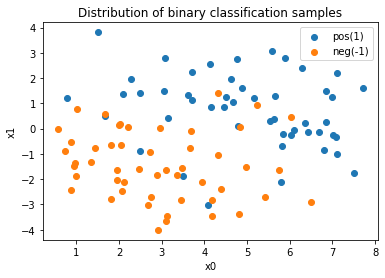

In [6]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

### prepare data to fit the model

In [176]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [148]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
x[:3]#x0,x1,x2

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ]])

In [149]:
y = df_y["y"].values
y[:3]

array([-1, -1, -1])

Sigmoid function $g(z)$

In [177]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

$h_{\theta}(x) = g(\theta^Tx)$

In [160]:
def hypothesis(x,theta):
  return np.dot(x,theta)

dot product

In [152]:
x1 = [1,2,3]
y1 = [1,2,3]
np.dot(x1,y1)

14

Initialize $\theta$

In [154]:
initial_theta = np.zeros((x.shape[1],1))
initial_theta.shape

(3, 1)

In [155]:
initial_theta

array([[0.],
       [0.],
       [0.]])

$\nabla_{\theta}J(\theta)$

$\frac{d}{d\theta_j}J(\theta)=-\frac{1}{m}\sum_{i=1}^m(1-h_{\theta}(y^ix^i))y^ix^i_j$

In [198]:
def gradient(theta,x,y):
  z = y*hypothesis(x,theta)
  h = sigmoid(z)
  g = -np.mean((1-h)*y*x.T, axis = 1)
  return g

 #### Hessian Matrix (H)
n = # of columns in input data(number of features + 1)

i : datasample

H in  $\mathbb{R}^{(n+1)(n+1)}$

 $\frac{1}{m} ∑_{i=1}^{m}h_{\theta}(y^ix^i)(1-h_{\theta}(y^ix^i))x^i_jx^i_k$

In [199]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [200]:
x.shape

(99, 3)

In [201]:
def hessian(theta, x, y):
  hess = np.zeros((x.shape[1], x.shape[1]))#n+1 dimension
  z = y*hypothesis(x,theta)
  h = sigmoid(z)
  #2nd dimensional array
  for i in range(hess.shape[0]):#accessing data samples(1~m(:99))
    for j in range(hess.shape[0]):
      if i <= j:
        #fill hessian matrix
        hess[i][j] = np.mean(h*(1-h)*x[:,i]*x[:,j])
        if i != j:
          hess[j][i] = hess[i][j]#symmetric matrix
  #print("hessian shape:",hess.shape)
  return hess

### Newton's method

$\theta := \theta- H^{-1}\nabla_{\theta}J(\theta)$

delta intialize 어떻게 하는거지?

In [209]:
def newton(initial_theta, x,y, eps):
  theta = initial_theta#intialize theta by 0
  delta = 1#goal = 0
  while delta > eps:#goal: to reduce delta
    theta_prev = theta.copy()#create a new copy of theta(different from =)
    result_h = hessian(theta,x,y)
    
    gr = gradient(theta,x,y)
    
    theta -= np.linalg.inv(result_h).dot(gr)#np.linalg.inv: inverse matrix
    
    delta = np.linalg.norm(theta-theta_prev, ord = 1)#find distance(delta)
  return theta, delta

## Run Newton's method to perform logistic regression

In [210]:
# Initialize theta0
theta0 = np.zeros((x.shape[1]))
theta0.shape

(3,)

In [211]:
theta_final, delta = newton(theta0, x,y,1e-6)#eps:le-6

In [212]:
print("final theta: {}".format(theta_final))

final theta: [-2.6205116   0.76037154  1.17194674]


In [213]:
delta

4.146349930067572e-12

In [219]:
print("weights: ",theta_final)

weights:  [-2.6205116   0.76037154  1.17194674]


In [247]:
b = theta_final[0]
w1 = theta_final[1]
w2 = theta_final[2]
c = -b/w2
m = -w1/w2

In [248]:
xmin, xmax = -0.5, 10
xd = np.array([xmin, xmax])
yd = m*xd + c

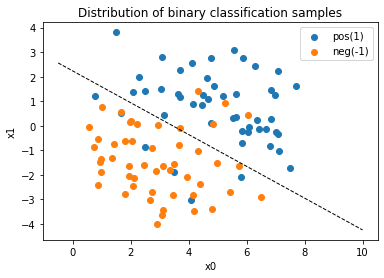

In [249]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

## See if scikit-learn's regression returns the same result.

### Step 1: Importing all the required libraries

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [221]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)

In [222]:
sk_y = df_y["y"].values
sk_x = df_x[["x1","x2"]].values

In [226]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(sk_x, sk_y, test_size = 0.25)

In [227]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.3665743982511037


In [228]:
regr.coef_

array([0.24339122, 0.27261051])

In [229]:
regr.intercept_

-0.9383717151741213

### plot decision boundary of scikit-learn

In [231]:
b = regr.intercept_
w1, w2 = regr.coef_.T

In [232]:
c = -b/w2
m = -w1/w2

In [244]:
xmin, xmax = -0.5, 10
xd = np.array([xmin, xmax])
yd = m*xd + c

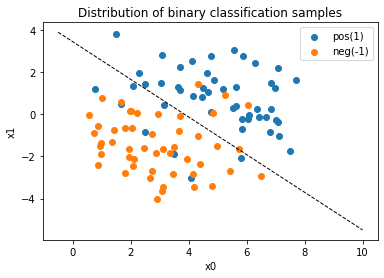

In [245]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()
#Scikit-learn: 8+5

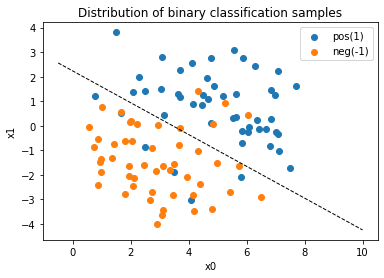

In [250]:
#Newton's method decision boundary: 5+5

Performance of Newton's method seems better,,?